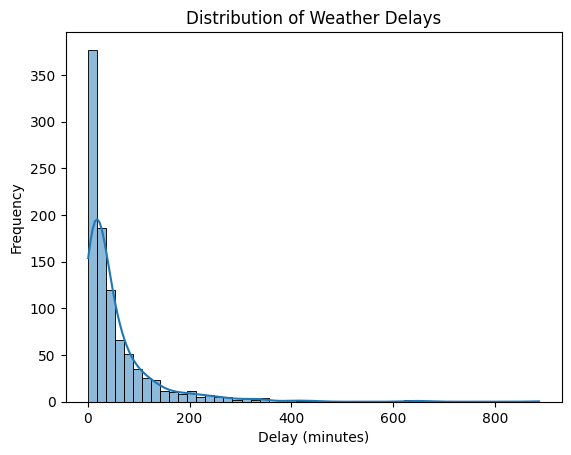

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pyfiglet

# Reading data
data = pd.read_csv("tnst_matched.csv")

# Building distribution & scoring delays
mu = np.mean(data["weather_delay"])
sigma = np.std(data["weather_delay"])
data["weather_z_score"] = (data["weather_delay"] - mu) / sigma

# Visualizing distribution
sns.histplot(data["weather_delay"], kde=True, bins=50)
plt.title("Distribution of Weather Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

R2 Score: -0.5629768249168958


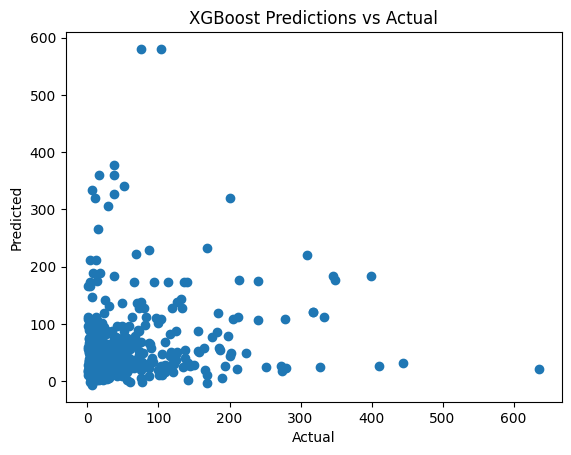

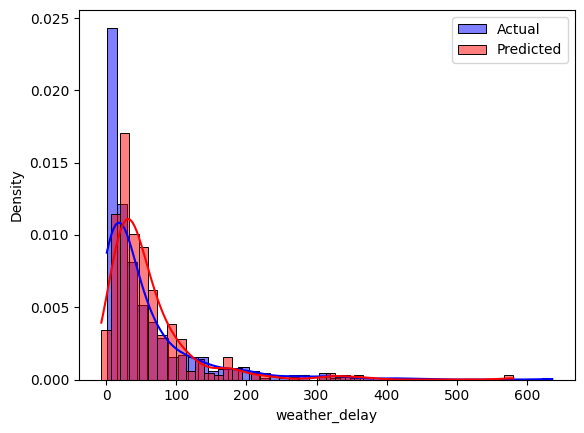

In [80]:
# Creating features and targets
X = data[["wind_speed", "wind_gust", "ceiling", "visibility", "temp", "dew_pnt", "pressure"]]
y = data["weather_delay"]

# Splitting into into train test batches
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=50)

# Bulding XGBoost Model
model = XGBRegressor(
    n_estimators=100,
    max_depth=8, # the number of features
    learning_rate=0.2
)

# Training and testing model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Showing R2 Score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

# Graph Comparing Predictions vs Actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost Predictions vs Actual")
plt.show()

# Historgam comparing normal distributions
sns.histplot(y_test, color='blue', kde=True, stat='density', label='Actual')
sns.histplot(y_pred, color='red', kde=True, stat='density', label='Predicted')
plt.legend()
plt.show()

### Results Explanation:
##### The data consisted of around 1000 data points for KBNA (ICAO code), or Nashville International Airport (2015-2016) for weather delays. Input data consisted of temperature, dewpoint, pressure, wind speed, wind gusts, visibility, and cloud ceiling (METAR data). The output being predicted is the expected delay (in minutes) caused by the given weather conditions. Additionally to this we also used all the data to develop a normal distribution curve which allows us to then give meaning to the output from our model. To interpret the models output we can simply take the z-score of the given weather prediction and calculate the area on the left half to obtain information on how severe the weather conditions are

#### Why normal build normal distribution?:
##### By building a normal distribution and rating weather severity score based off that we allow the data to decide what is extreme weather, without having to introduce our own personal bias.
